In [1]:
import pandas as pd

# 파일 경로
file_path = './data/소상공인시장진흥공단_소상공인 경기동향(BSI) 현황_20250620.csv'

# 1. cp949로 시도
try:
    df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    # 2. utf-8-sig로 재시도
    df = pd.read_csv(file_path, encoding='utf-8-sig')

# 데이터 확인
print(df.head())
print(df.columns)

     연도  월  경기전반체감  경기전반전망   매출체감   매출전망  자금사정체감  자금사정전망  비용상황체감  비용상황전망  ...  \
0  2013  1    65.5    93.7   65.7   96.7    68.1    96.1     NaN     NaN  ...   
1  2013  2    66.8    83.6   67.9   82.7    70.9    80.9     NaN     NaN  ...   
2  2013  3    95.4   103.7  116.3  102.3    88.5    94.3     NaN     NaN  ...   
3  2013  4    92.5   103.2   93.5  102.7    90.0    95.4     NaN     NaN  ...   
4  2013  5    98.7   106.1   99.7  106.4    95.6    98.5     NaN     NaN  ...   

    전북체감   전북전망   전남체감   전남전망  경북체감  경북전망   경남체감   경남전망   제주체감   제주전망  
0   50.0  104.6   60.5   83.4  68.4  97.0   52.4   92.5   75.0   95.0  
1   63.7   77.9   66.1   82.7  60.9  77.9   64.3   78.4   97.5  105.0  
2   91.2  101.8  127.5  134.5  97.0  94.1  100.5  103.6   95.0   96.3  
3  100.0  110.6  107.9  127.9  88.1  98.0   94.5   97.7  101.3   90.0  
4   98.8  109.6  110.2  123.2  88.5  94.1   95.9  101.4  108.8  116.3  

[5 rows x 72 columns]
Index(['연도', '월', '경기전반체감', '경기전반전망', '매출체감', '매출전망', '자금사

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib.font_manager as fm

# 사용 가능한 폰트 확인
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if 'Gothic' in f or 'Nanum' in f or 'Malgun' in f]
print("사용 가능한 한글 폰트:", korean_fonts)

# 첫 번째 한글 폰트 사용
if korean_fonts:
    plt.rcParams['font.family'] = korean_fonts[0]
    print(f"폰트 설정: {korean_fonts[0]}")
else:
    print("한글 폰트를 찾을 수 없습니다.")

사용 가능한 한글 폰트: ['BIZ UDGothic', 'AppleGothic', 'Apple SD Gothic Neo', 'Nanum Myeongjo', 'Tsukushi B Round Gothic', 'Toppan Bunkyu Midashi Gothic', 'Toppan Bunkyu Gothic', 'Nanum Gothic', 'Hiragino Maru Gothic Pro', 'Tsukushi A Round Gothic', 'YuGothic', 'Noto Sans Gothic', 'YuGothic', 'Apple LiGothic', 'Nanum Brush Script']
폰트 설정: BIZ UDGothic


In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'BIZ UDGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 폰트 적용 확인
print(plt.rcParams['font.family'])


['BIZ UDGothic']


In [3]:
# 데이터 로드
file_path = './data/소상공인시장진흥공단_소상공인 경기동향(BSI) 현황_20250620.csv'

try:
    df = pd.read_csv(file_path, encoding='cp949')
    print("cp949 인코딩으로 성공적으로 로드되었습니다.")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print("utf-8-sig 인코딩으로 성공적으로 로드되었습니다.")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='utf-8')
        print("utf-8 인코딩으로 성공적으로 로드되었습니다.")

print(f"\n데이터 형태: {df.shape}")
print(f"기간: {df['연도'].min()}년 {df['월'].min()}월 ~ {df['연도'].max()}년 {df['월'].max()}월")

cp949 인코딩으로 성공적으로 로드되었습니다.

데이터 형태: (150, 72)
기간: 2013년 1월 ~ 2025년 12월


In [4]:
# 데이터 기본 정보 확인
print("=== 데이터 기본 정보 ===")
print(df.info())

print("\n=== 결측치 확인 ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n=== 데이터 미리보기 ===")
print(df.head())

=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 72 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연도          150 non-null    int64  
 1   월           150 non-null    int64  
 2   경기전반체감      149 non-null    float64
 3   경기전반전망      150 non-null    float64
 4   매출체감        149 non-null    float64
 5   매출전망        150 non-null    float64
 6   자금사정체감      149 non-null    float64
 7   자금사정전망      150 non-null    float64
 8   비용상황체감      41 non-null     float64
 9   비용상황전망      41 non-null     float64
 10  구매고객수 체감    41 non-null     float64
 11  구매고객수 전망    41 non-null     float64
 12  재고체감        24 non-null     float64
 13  재고전망        24 non-null     float64
 14  고용체감        24 non-null     float64
 15  고용전망        24 non-null     float64
 16  영업이익체감      84 non-null     float64
 17  영업이익전망      84 non-null     float64
 18  원재료조달사정체감   84 non-null     float64
 19  원재료조달사정전망  

In [5]:
# 날짜 컬럼 생성
df['날짜'] = pd.to_datetime(df['연도'].astype(str) + '-' + df['월'].astype(str) + '-01')
df = df.sort_values('날짜')

print("날짜 컬럼이 생성되었습니다.")
print(df[['연도', '월', '날짜']].head())

날짜 컬럼이 생성되었습니다.
     연도  월         날짜
0  2013  1 2013-01-01
1  2013  2 2013-02-01
2  2013  3 2013-03-01
3  2013  4 2013-04-01
4  2013  5 2013-05-01


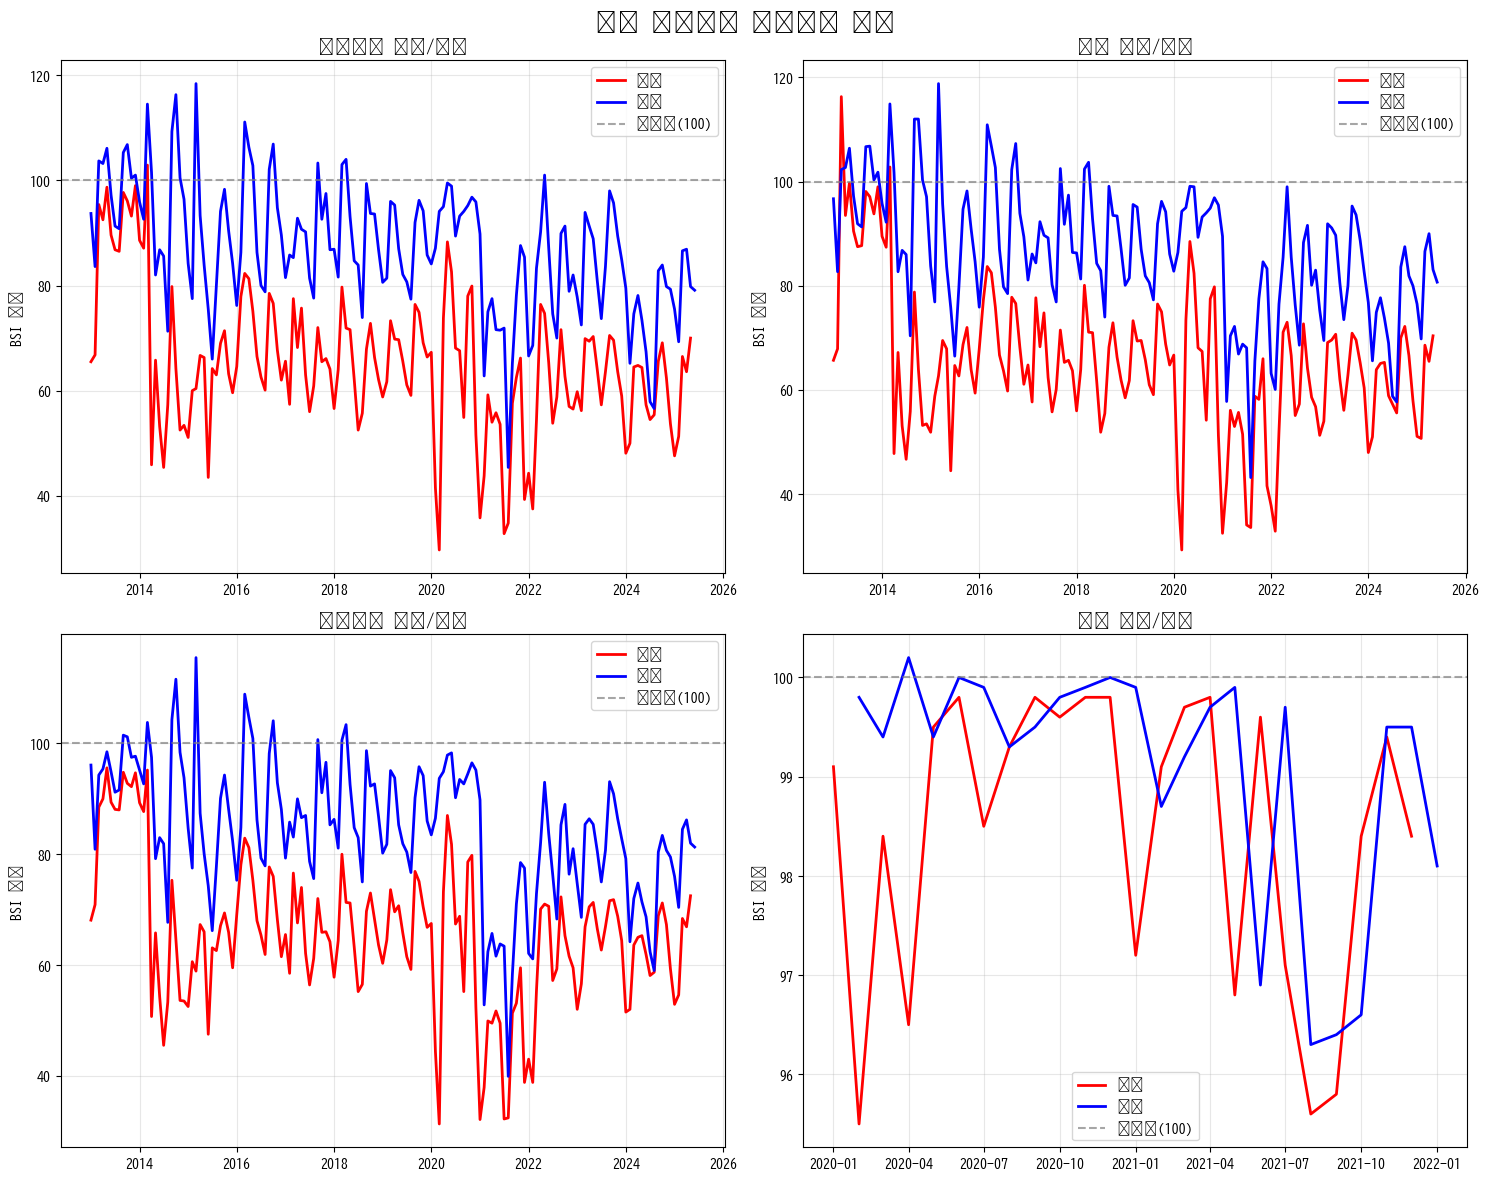

In [15]:
# 전국 경기동향 시계열 분석
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('전국 소상공인 경기동향 분석', fontsize=16, fontweight='bold')

# 1. 경기전반 체감/전망
axes[0, 0].plot(df['날짜'], df['경기전반체감'], label='체감', linewidth=2, color='red')
axes[0, 0].plot(df['날짜'], df['경기전반전망'], label='전망', linewidth=2, color='blue')
axes[0, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 0].set_title('경기전반 체감/전망')
axes[0, 0].set_ylabel('BSI 지수')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 매출 체감/전망
axes[0, 1].plot(df['날짜'], df['매출체감'], label='체감', linewidth=2, color='red')
axes[0, 1].plot(df['날짜'], df['매출전망'], label='전망', linewidth=2, color='blue')
axes[0, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 1].set_title('매출 체감/전망')
axes[0, 1].set_ylabel('BSI 지수')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 자금사정 체감/전망
axes[1, 0].plot(df['날짜'], df['자금사정체감'], label='체감', linewidth=2, color='red')
axes[1, 0].plot(df['날짜'], df['자금사정전망'], label='전망', linewidth=2, color='blue')
axes[1, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 0].set_title('자금사정 체감/전망')
axes[1, 0].set_ylabel('BSI 지수')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 고용 체감/전망
axes[1, 1].plot(df['날짜'], df['고용체감'], label='체감', linewidth=2, color='red')
axes[1, 1].plot(df['날짜'], df['고용전망'], label='전망', linewidth=2, color='blue')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 1].set_title('고용 체감/전망')
axes[1, 1].set_ylabel('BSI 지수')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

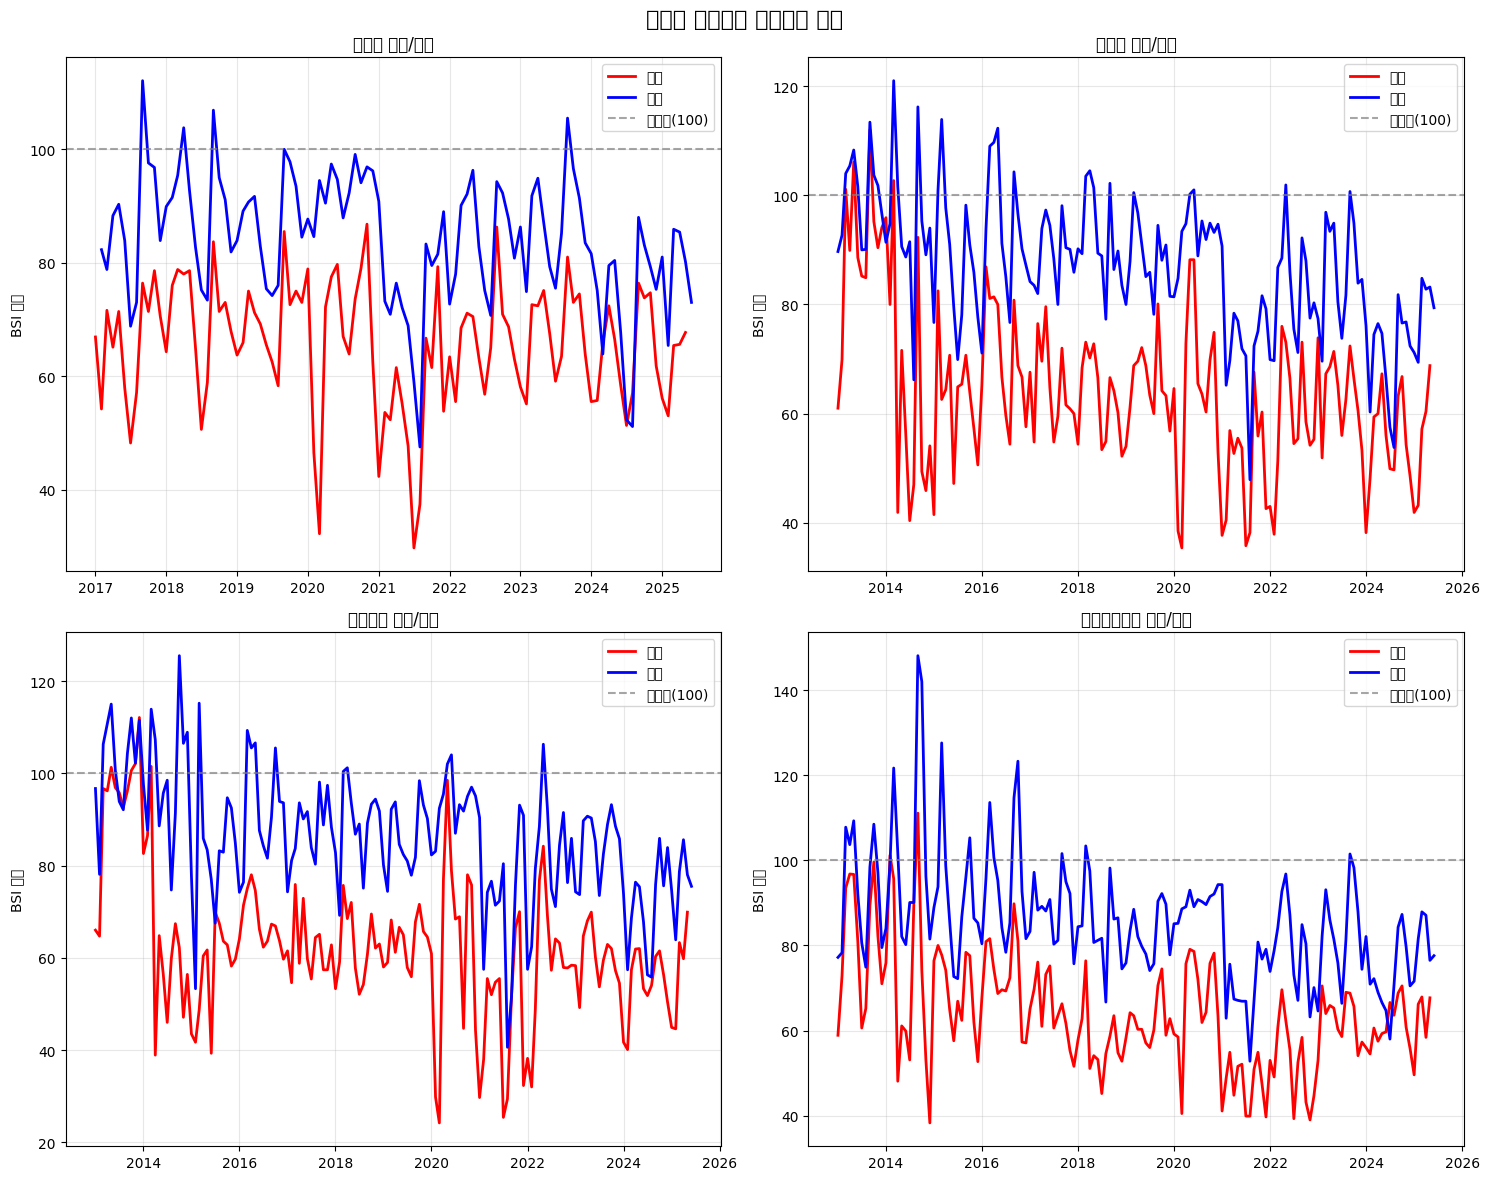

In [7]:
# 업종별 경기동향 분석
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('업종별 소상공인 경기동향 분석', fontsize=16, fontweight='bold')

# 1. 제조업
axes[0, 0].plot(df['날짜'], df['제조업체감'], label='체감', linewidth=2, color='red')
axes[0, 0].plot(df['날짜'], df['제조업전망'], label='전망', linewidth=2, color='blue')
axes[0, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 0].set_title('제조업 체감/전망')
axes[0, 0].set_ylabel('BSI 지수')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 소매업
axes[0, 1].plot(df['날짜'], df['소매업체감'], label='체감', linewidth=2, color='red')
axes[0, 1].plot(df['날짜'], df['소매업전망'], label='전망', linewidth=2, color='blue')
axes[0, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 1].set_title('소매업 체감/전망')
axes[0, 1].set_ylabel('BSI 지수')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 음식점업
axes[1, 0].plot(df['날짜'], df['음식점업체감'], label='체감', linewidth=2, color='red')
axes[1, 0].plot(df['날짜'], df['음식점업전망'], label='전망', linewidth=2, color='blue')
axes[1, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 0].set_title('음식점업 체감/전망')
axes[1, 0].set_ylabel('BSI 지수')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 부동산중개업
axes[1, 1].plot(df['날짜'], df['부동산중개업체감'], label='체감', linewidth=2, color='red')
axes[1, 1].plot(df['날짜'], df['부동산중개업전망'], label='전망', linewidth=2, color='blue')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 1].set_title('부동산중개업 체감/전망')
axes[1, 1].set_ylabel('BSI 지수')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

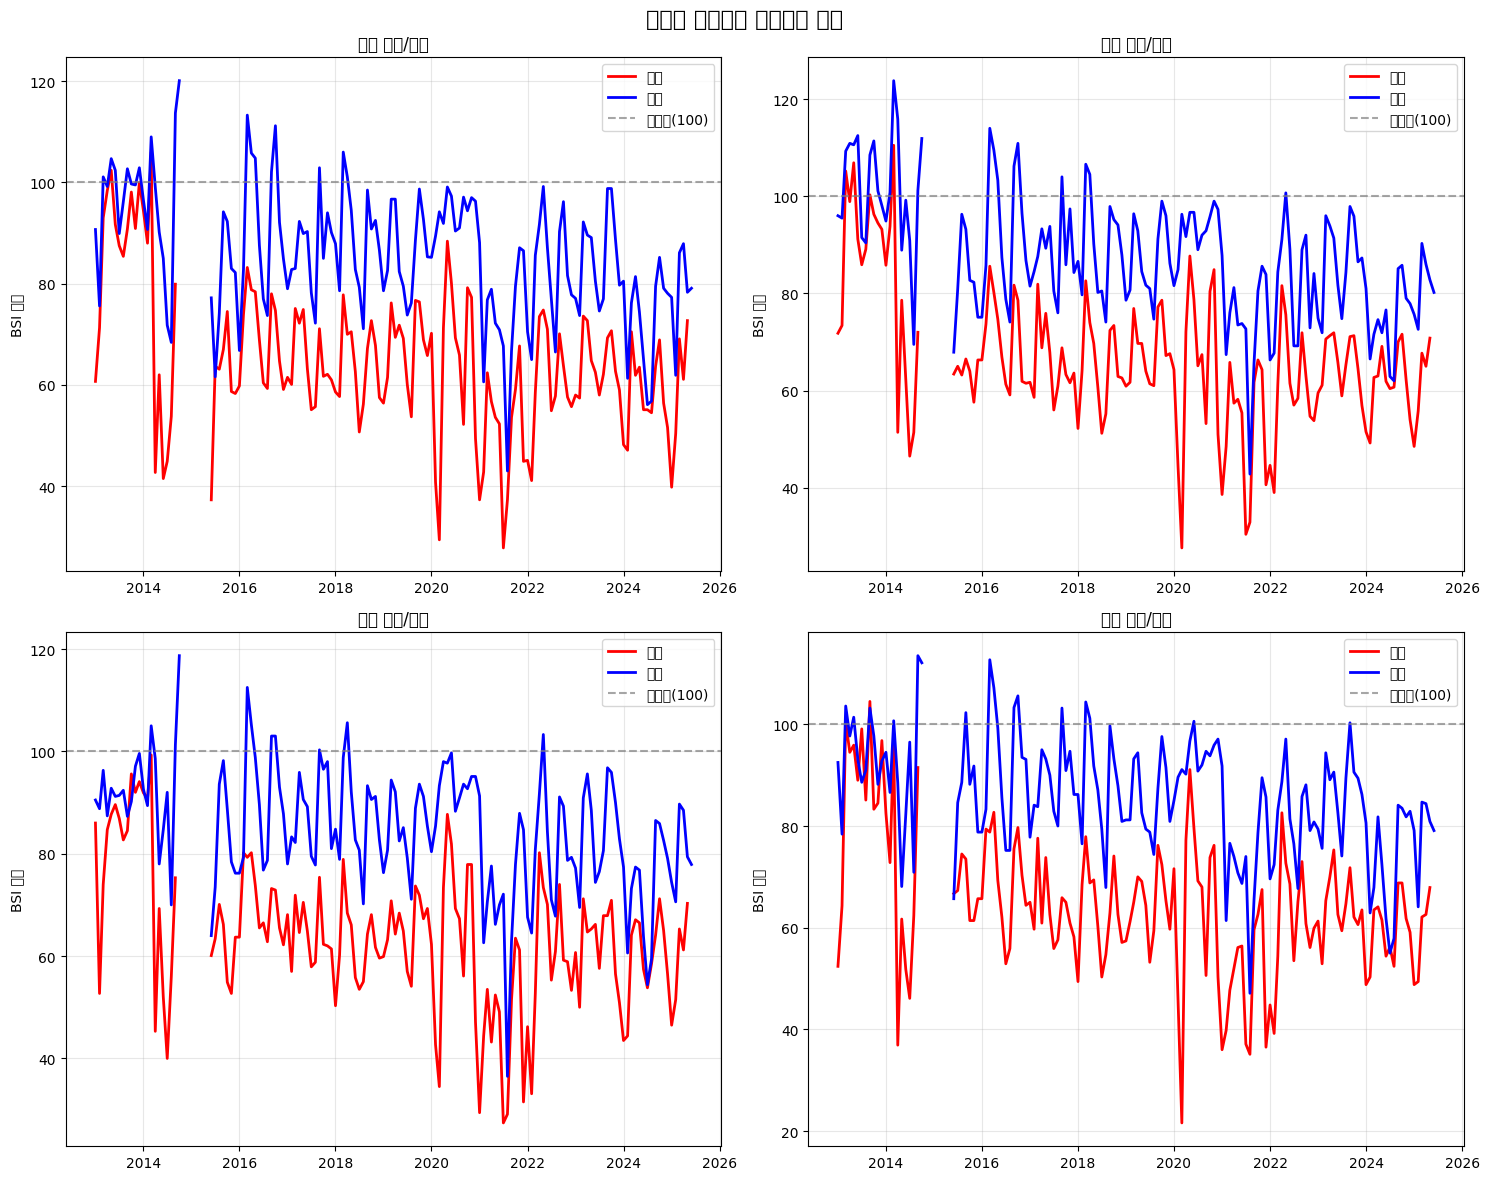

In [8]:
# 지역별 경기동향 분석 (주요 지역)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('지역별 소상공인 경기동향 분석', fontsize=16, fontweight='bold')

# 1. 서울
axes[0, 0].plot(df['날짜'], df['서울체감'], label='체감', linewidth=2, color='red')
axes[0, 0].plot(df['날짜'], df['서울전망'], label='전망', linewidth=2, color='blue')
axes[0, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 0].set_title('서울 체감/전망')
axes[0, 0].set_ylabel('BSI 지수')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 경기
axes[0, 1].plot(df['날짜'], df['경기체감'], label='체감', linewidth=2, color='red')
axes[0, 1].plot(df['날짜'], df['경기전망'], label='전망', linewidth=2, color='blue')
axes[0, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 1].set_title('경기 체감/전망')
axes[0, 1].set_ylabel('BSI 지수')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 부산
axes[1, 0].plot(df['날짜'], df['부산체감'], label='체감', linewidth=2, color='red')
axes[1, 0].plot(df['날짜'], df['부산전망'], label='전망', linewidth=2, color='blue')
axes[1, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 0].set_title('부산 체감/전망')
axes[1, 0].set_ylabel('BSI 지수')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 경남
axes[1, 1].plot(df['날짜'], df['경남체감'], label='체감', linewidth=2, color='red')
axes[1, 1].plot(df['날짜'], df['경남전망'], label='전망', linewidth=2, color='blue')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 1].set_title('경남 체감/전망')
axes[1, 1].set_ylabel('BSI 지수')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

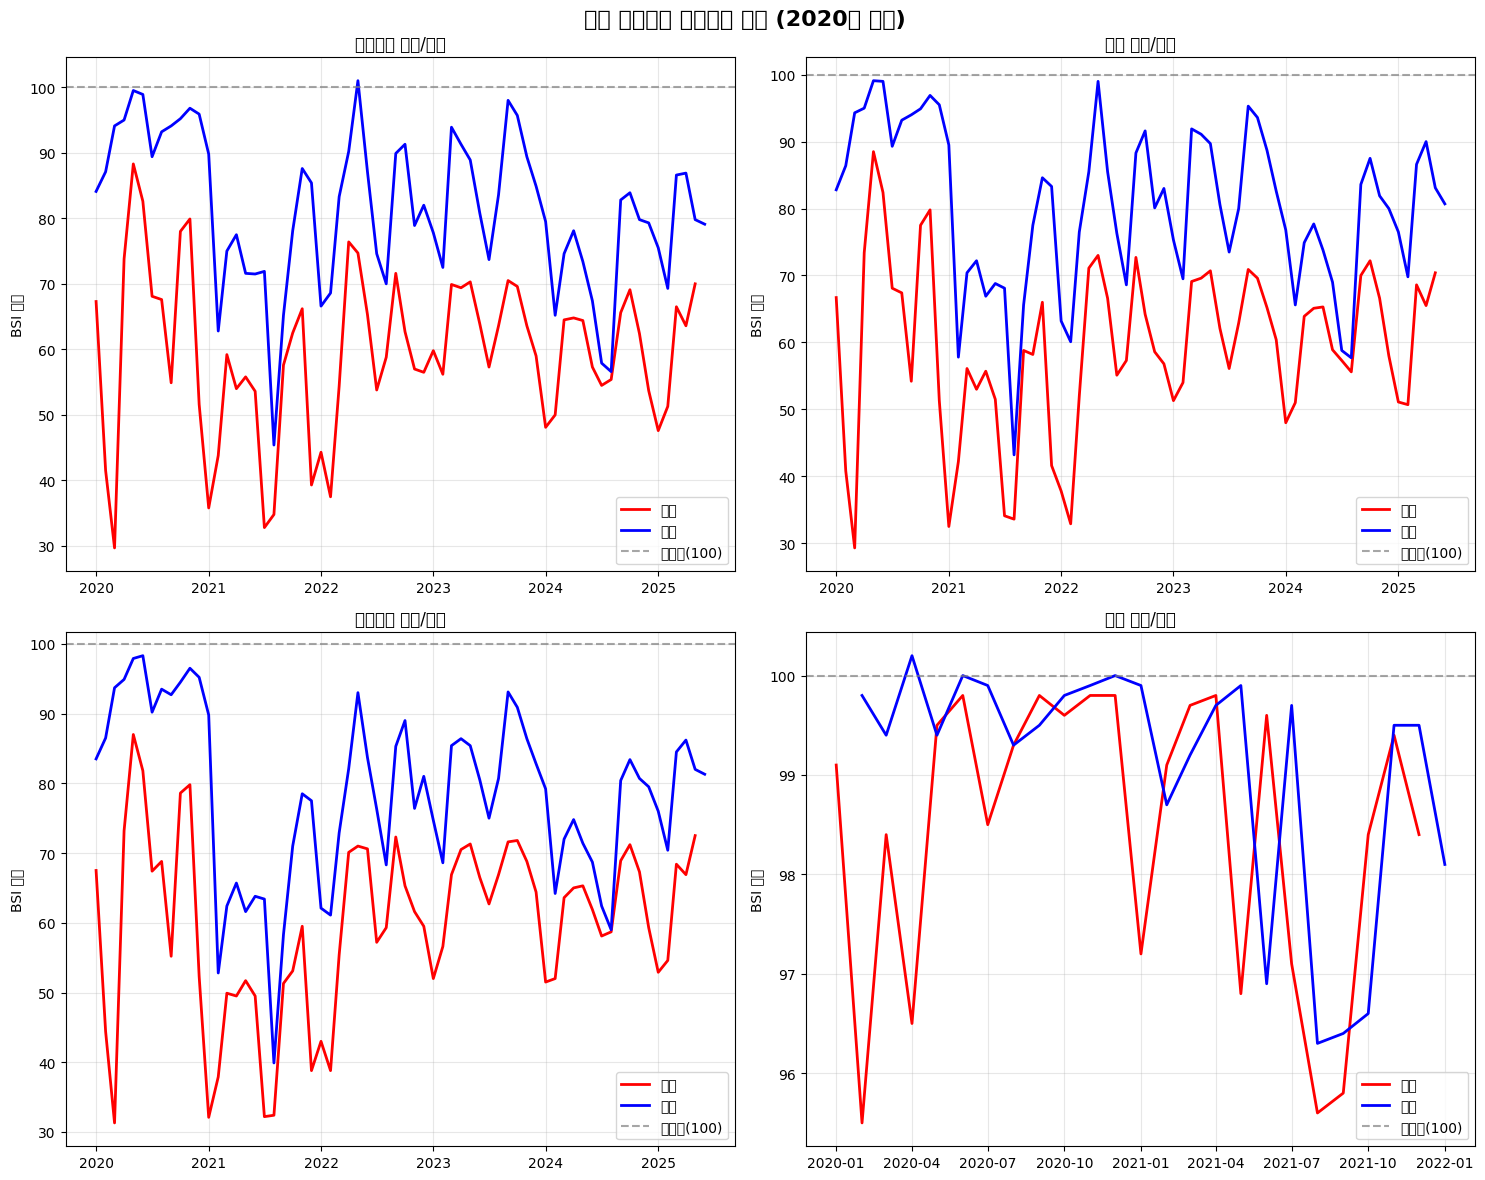

In [9]:
# 2020년 이후 데이터 필터링
df_recent = df[df['연도'] >= 2020].copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('최근 소상공인 경기동향 분석 (2020년 이후)', fontsize=16, fontweight='bold')

# 1. 경기전반
axes[0, 0].plot(df_recent['날짜'], df_recent['경기전반체감'], label='체감', linewidth=2, color='red')
axes[0, 0].plot(df_recent['날짜'], df_recent['경기전반전망'], label='전망', linewidth=2, color='blue')
axes[0, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 0].set_title('경기전반 체감/전망')
axes[0, 0].set_ylabel('BSI 지수')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. 매출
axes[0, 1].plot(df_recent['날짜'], df_recent['매출체감'], label='체감', linewidth=2, color='red')
axes[0, 1].plot(df_recent['날짜'], df_recent['매출전망'], label='전망', linewidth=2, color='blue')
axes[0, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[0, 1].set_title('매출 체감/전망')
axes[0, 1].set_ylabel('BSI 지수')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. 자금사정
axes[1, 0].plot(df_recent['날짜'], df_recent['자금사정체감'], label='체감', linewidth=2, color='red')
axes[1, 0].plot(df_recent['날짜'], df_recent['자금사정전망'], label='전망', linewidth=2, color='blue')
axes[1, 0].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 0].set_title('자금사정 체감/전망')
axes[1, 0].set_ylabel('BSI 지수')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 고용
axes[1, 1].plot(df_recent['날짜'], df_recent['고용체감'], label='체감', linewidth=2, color='red')
axes[1, 1].plot(df_recent['날짜'], df_recent['고용전망'], label='전망', linewidth=2, color='blue')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='기준선(100)')
axes[1, 1].set_title('고용 체감/전망')
axes[1, 1].set_ylabel('BSI 지수')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# 주요 지표 통계 요약
print("=== 주요 지표 통계 요약 ===")
summary_columns = ['경기전반체감', '경기전반전망', '매출체감', '매출전망', '자금사정체감', '자금사정전망', '고용체감', '고용전망']
summary_df = df[summary_columns].describe()
print(summary_df)

print("\n=== 최근 12개월 평균 (2024년 7월 ~ 2025년 6월) ===")
recent_12m = df.tail(12)[summary_columns].mean()
print(recent_12m.round(2))

=== 주요 지표 통계 요약 ===
           경기전반체감      경기전반전망        매출체감        매출전망      자금사정체감      자금사정전망  \
count  149.000000  150.000000  149.000000  150.000000  149.000000  150.000000   
mean    65.183221   87.175333   65.351007   86.707333   65.393289   84.716000   
std     13.594938   12.198773   14.306786   12.611155   13.103005   12.262083   
min     29.700000   45.400000   29.300000   43.200000   31.300000   39.900000   
25%     57.300000   79.575000   56.800000   79.850000   58.100000   78.050000   
50%     64.500000   86.850000   65.200000   86.500000   65.900000   85.300000   
75%     71.600000   95.150000   71.100000   95.075000   71.300000   93.775000   
max    102.900000  118.400000  116.300000  118.800000   95.600000  115.500000   

            고용체감        고용전망  
count  24.000000   24.000000  
mean   98.437500   99.066667  
std     1.484064    1.236287  
min    95.500000   96.300000  
25%    97.175000   99.075000  
50%    99.100000   99.500000  
75%    99.625000   99.900000  
ma

In [11]:
# 지역별 최근 경기동향 비교
print("=== 지역별 최근 경기동향 비교 (2025년 6월 기준) ===")
latest_data = df.iloc[-1]

regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

region_comparison = []
for region in regions:
    if f'{region}체감' in df.columns and f'{region}전망' in df.columns:
        region_comparison.append({
            '지역': region,
            '체감': latest_data[f'{region}체감'],
            '전망': latest_data[f'{region}전망']
        })

region_df = pd.DataFrame(region_comparison)
region_df = region_df.sort_values('체감', ascending=False)
print(region_df.round(2))

=== 지역별 최근 경기동향 비교 (2025년 6월 기준) ===
    지역  체감    전망
0   서울 NaN  79.1
1   부산 NaN  77.9
2   대구 NaN  81.0
3   인천 NaN  82.5
4   광주 NaN  80.5
5   대전 NaN  77.5
6   울산 NaN  77.6
7   세종 NaN  76.0
8   경기 NaN  80.2
9   강원 NaN  81.8
10  충북 NaN  81.3
11  충남 NaN  76.9
12  전북 NaN  79.5
13  전남 NaN  75.6
14  경북 NaN  72.3
15  경남 NaN  79.1
16  제주 NaN  85.1


In [12]:
# 업종별 최근 경기동향 비교
print("=== 업종별 최근 경기동향 비교 (2025년 6월 기준) ===")

industries = ['제조업', '소매업', '음식점업', '부동산중개업', '전문기술사업', '교육서비스업', '스포츠및오락관련', '수리업', '개인서비스업']

industry_comparison = []
for industry in industries:
    if f'{industry}체감' in df.columns and f'{industry}전망' in df.columns:
        industry_comparison.append({
            '업종': industry,
            '체감': latest_data[f'{industry}체감'],
            '전망': latest_data[f'{industry}전망']
        })

industry_df = pd.DataFrame(industry_comparison)
industry_df = industry_df.sort_values('체감', ascending=False)
print(industry_df.round(2))

=== 업종별 최근 경기동향 비교 (2025년 6월 기준) ===
         업종  체감    전망
0       제조업 NaN  73.0
1       소매업 NaN  79.4
2      음식점업 NaN  75.5
3    부동산중개업 NaN  77.6
4    전문기술사업 NaN  84.5
5    교육서비스업 NaN  90.1
6  스포츠및오락관련 NaN  81.1
7       수리업 NaN  79.6
8    개인서비스업 NaN  78.2
